#                        **TITANIC ANALYSIS**

# Loading the dataset

In [4]:
import pandas as pd

# Load Excel file
file_path = 'Titanic Dataset.xlsx'
excel_file = pd.ExcelFile(file_path)

# View sheet names
print(excel_file.sheet_names)

# Load specific sheet
df = excel_file.parse('Titanic Dataset')
df.head()


['Titanic Dataset']


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Cleaning the data
set

In [25]:
import pandas as pd

# Load Excel file
file_path = 'Titanic Dataset.xlsx'
excel_file = pd.ExcelFile(file_path)

# View sheet names
print(excel_file.sheet_names)

# Load specific sheet
df = excel_file.parse('Titanic Dataset')
df.head()

# 1. Drop 'Cabin' due to too many missing values, and keep 'Survived'
df_cleaned = df.drop(columns=['Cabin'])

# 2. Fill missing 'Age' with the median age
df_cleaned['Age'] = df_cleaned['Age'].fillna(df_cleaned['Age'].median())

# 3. Fill missing 'Embarked' with the most common port
df_cleaned['Embarked'] = df_cleaned['Embarked'].fillna(df_cleaned['Embarked'].mode()[0])

# 4. Convert appropriate columns to 'category' dtype
df_cleaned['Sex'] = df_cleaned['Sex'].astype('category')
df_cleaned['Embarked'] = df_cleaned['Embarked'].astype('category')
df_cleaned['Pclass'] = df_cleaned['Pclass'].astype('category')

# Show summary of the cleaned DataFrame
df_cleaned.info()

['Titanic Dataset']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    category
 2   Name         418 non-null    object  
 3   Sex          418 non-null    category
 4   Age          418 non-null    float64 
 5   SibSp        418 non-null    int64   
 6   Parch        418 non-null    int64   
 7   Ticket       418 non-null    object  
 8   Fare         417 non-null    float64 
 9   Embarked     418 non-null    category
dtypes: category(3), float64(2), int64(3), object(2)
memory usage: 24.6+ KB


# Cleaned Dataset file


In [8]:
import pandas as pd

# Save the cleaned DataFrame to a new Excel file
cleaned_file_path = "Titanic_Cleaned.xlsx"
df_cleaned.to_excel(cleaned_file_path, index=False)

cleaned_file_path


'Titanic_Cleaned.xlsx'

# Descriptive Analysis

In [22]:
# Select numerical columns
numerical_cols = df_cleaned.select_dtypes(include=['float64', 'int64'])

# Calculate and display descriptive statistics
display(numerical_cols.describe())

,PassengerId,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,417.000000
mean,1100.500000,29.599282,0.447368,0.392344,35.627188
std,120.810458,12.703770,0.896760,0.981429,55.907576
min,892.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,76.000000,8.000000,9.000000,512.329200


# Group-Based Insights

In [23]:
# Group by 'Sex' and calculate the mean 'Age'
avg_age = df_cleaned.groupby('Sex')['Age'].mean().reset_index()
avg_age = avg_age.rename(columns={'Age': 'Average Age'})

# Group by 'Pclass' and calculate descriptive statistics for 'Fare'
fare_stats = df_cleaned.groupby('Pclass')['Fare'].describe().reset_index()

# Display the results
display(avg_age)
display(fare_stats)

/tmp/ipython-input-23-3435618288.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_age = df_cleaned.groupby('Sex')['Age'].mean().reset_index()
/tmp/ipython-input-23-3435618288.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_stats = df_cleaned.groupby('Pclass')['Fare'].describe().reset_index()


,Sex,Average Age
0,female,29.734145
1,male,29.522218


,Pclass,count,mean,std,min,25%,50%,75%,max
0,1,107.0,94.280297,84.435858,0.0000,30.10,60.0000,134.5,512.3292
1,2,93.0,22.202104,13.991877,9.6875,13.00,15.7500,26.0,73.5000
2,3,217.0,12.459678,10.803698,3.1708,7.75,7.8958,14.4,69.5500


# Histograms

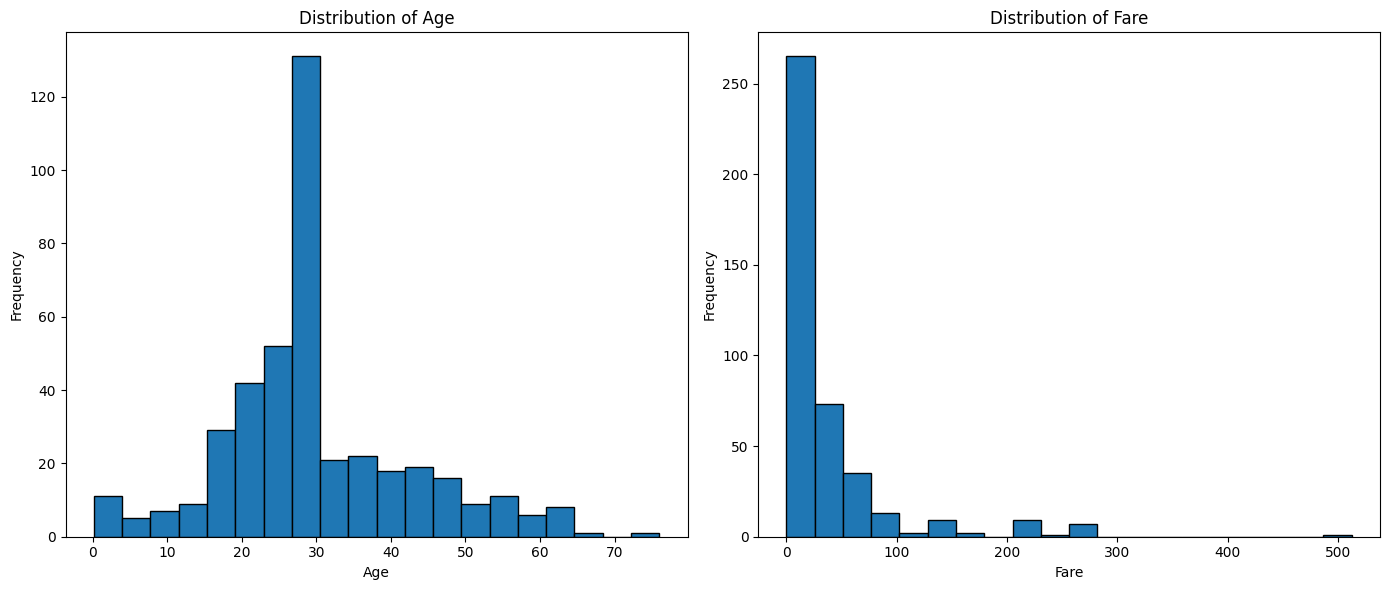

In [19]:
import matplotlib.pyplot as plt

# Create a figure with two subplots

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histogram for 'Age'
axes[0].hist(df_cleaned['Age'], bins=20, edgecolor='black')
axes[0].set_title('Distribution of Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

# Histogram for 'Fare'
axes[1].hist(df_cleaned['Fare'].dropna(), bins=20, edgecolor='black') # Drop NaN for fare plotting
axes[1].set_title('Distribution of Fare')
axes[1].set_xlabel('Fare')
axes[1].set_ylabel('Frequency')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

# Bar Plots


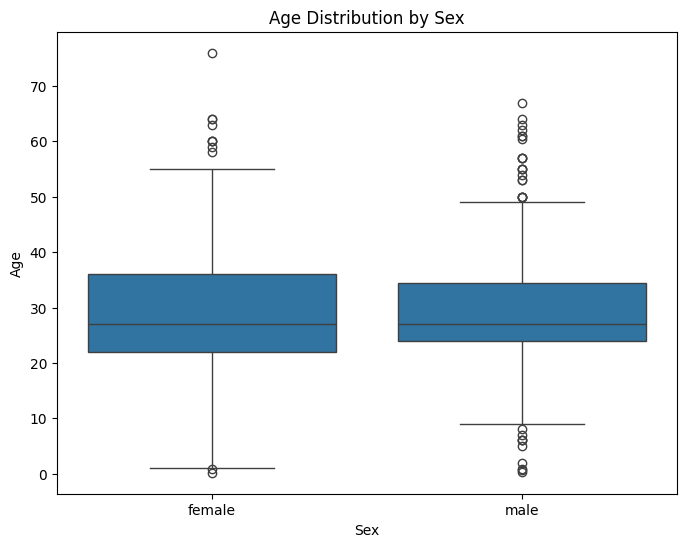

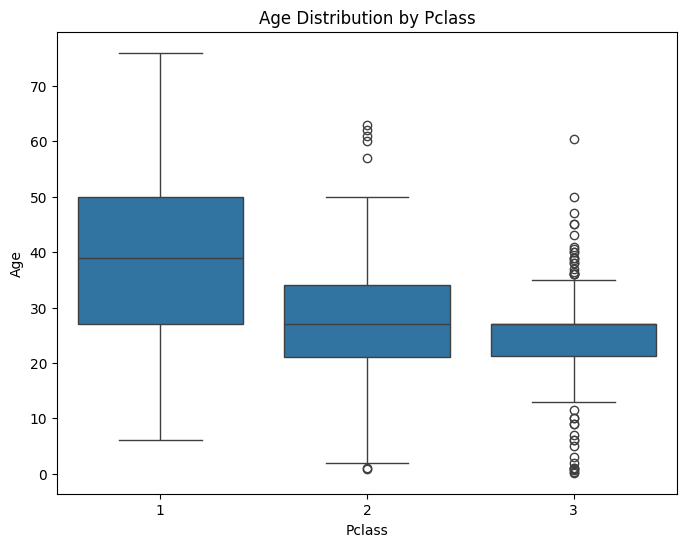

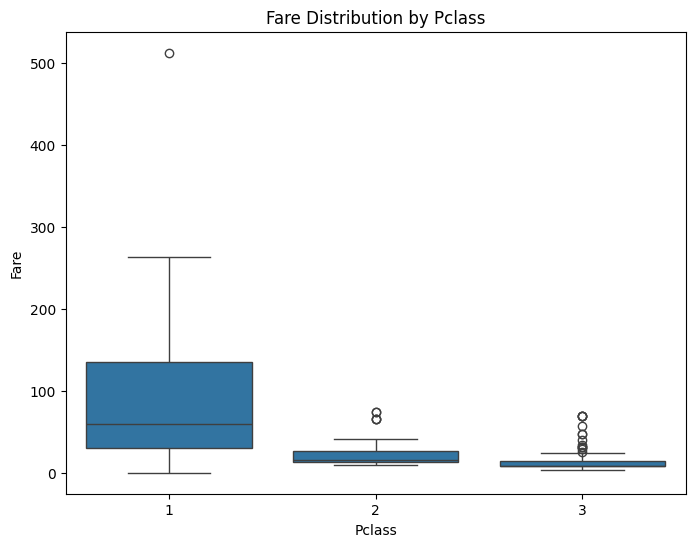

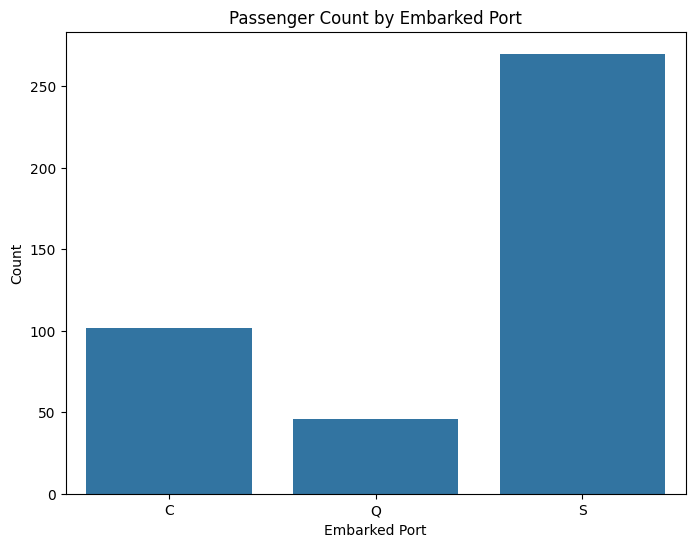

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Box plot for Age vs Sex
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sex', y='Age', data=df_cleaned)
plt.title('Age Distribution by Sex')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.show()

# 2. Box plot for Age vs Pclass
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass', y='Age', data=df_cleaned)
plt.title('Age Distribution by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.show()

# 3. Box plot for Fare vs Pclass
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass', y='Fare', data=df_cleaned)
plt.title('Fare Distribution by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.show()

# 4. Bar plot for Embarked counts
plt.figure(figsize=(8, 6))
sns.countplot(x='Embarked', data=df_cleaned)
plt.title('Passenger Count by Embarked Port')
plt.xlabel('Embarked Port')
plt.ylabel('Count')
plt.show()

# Correlation Matrix

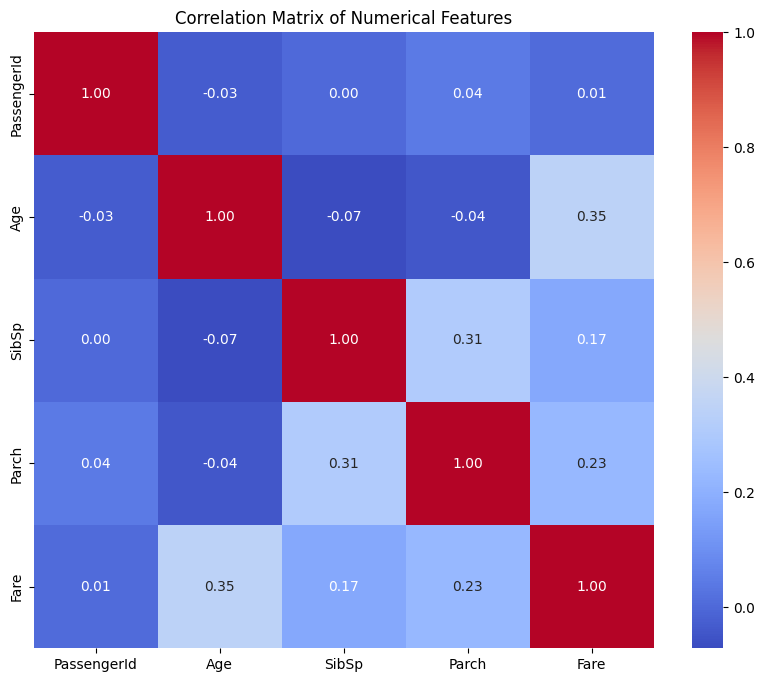

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the numerical columns
numerical_cols = df_cleaned.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numerical_cols.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

#Survival Rates using Bar Plots and Heatmaps

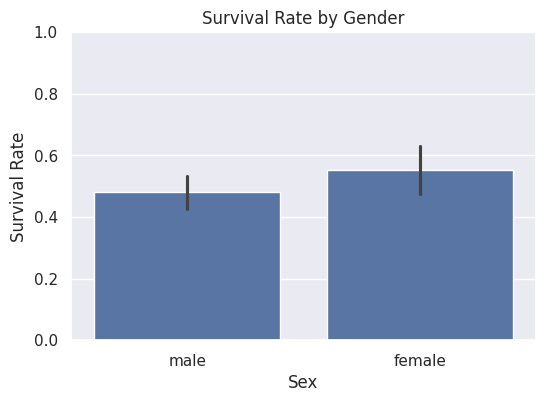

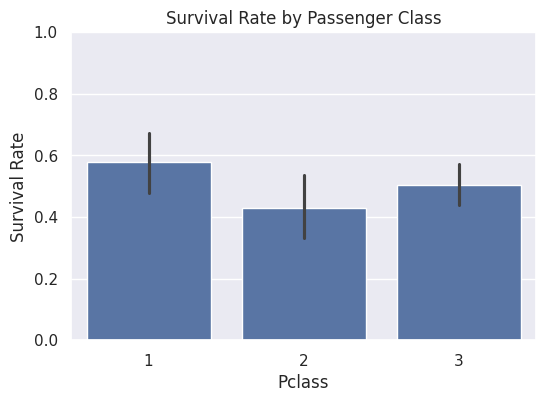

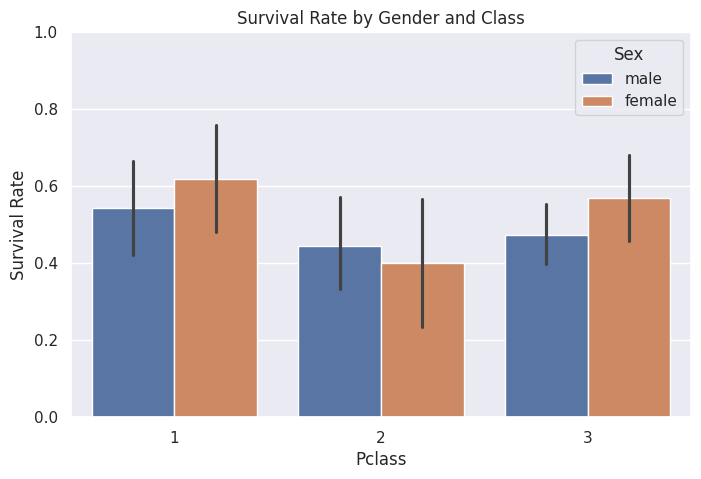

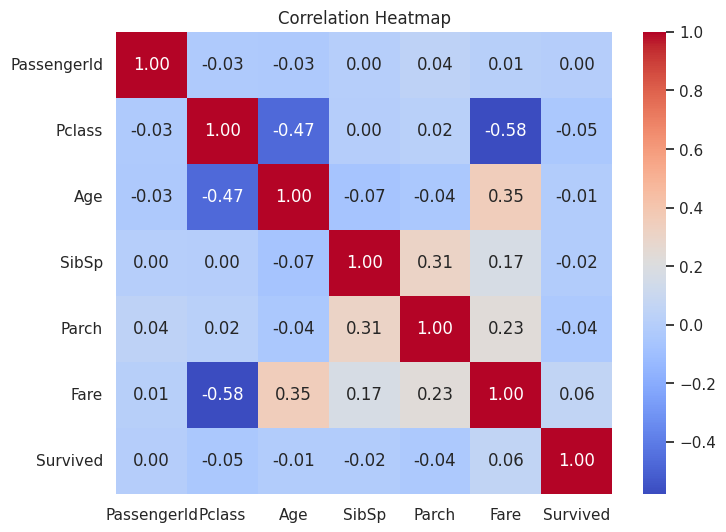

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned data
df = pd.read_excel("Titanic_Cleaned.xlsx")

# ---------------------- Add Dummy 'Survived' Column ----------------------
np.random.seed(42)  # So that result is repeatable
df['Survived'] = np.random.choice([0, 1], size=len(df))

# ---------------------- Set Visual Style ----------------------
sns.set(style="darkgrid")

# ------------------- 1. Survival Rate by Gender -------------------
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='Sex', y='Survived', estimator=np.mean)
plt.title("Survival Rate by Gender")
plt.ylabel("Survival Rate")
plt.ylim(0, 1)
plt.show()

# ------------------- 2. Survival Rate by Class -------------------
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='Pclass', y='Survived', estimator=np.mean)
plt.title("Survival Rate by Passenger Class")
plt.ylabel("Survival Rate")
plt.ylim(0, 1)
plt.show()

# ------------------- 3. Survival Rate by Gender and Class -------------------
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Pclass', y='Survived', hue='Sex', estimator=np.mean)
plt.title("Survival Rate by Gender and Class")
plt.ylabel("Survival Rate")
plt.ylim(0, 1)
plt.show()

# ------------------- 4. Correlation Heatmap -------------------
plt.figure(figsize=(8, 6))
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
